# <center><b> Competición Kaggle. Machine Learning </b></center>

# Importación de librerias

In [1]:
import re
import math
import collections
import numpy as np
import pandas as pd
import time
import operator
from scipy.io import mmread, mmwrite
from random import randint
#from sklearn import cross_validation
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
#from sklearn import preprocessing as pp
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import  RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.decomposition import ProbabilisticPCA, KernelPCA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
import scipy.stats as stats
from sklearn import tree
from sklearn.feature_selection import f_regression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, f1_score

# Lectura de los datos

Lectura del fichero *Train*

In [2]:
train_fs = pd.read_csv("/Users/raulartiguesfemenia/Desktop/Machine Learning/Sesión 7/Test7/loan-default-prediction/train_v2.csv.zip", delimiter=',')
train_fs.head()

/var/folders/bb/9rcbbv8x2kjb9lvr1vjr1djh0000gn/T/ipykernel_971/323844970.py:1: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  train_fs = pd.read_csv("/Users/raulartiguesfemenia/Desktop/Machine Learning/Sesión 7/Test7/loan-default-prediction/train_v2.csv.zip", delimiter=',')


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [3]:
train_fs.shape

(105471, 771)

Lectura del fichero *Test*

In [4]:
test_fs = pd.read_csv("/Users/raulartiguesfemenia/Desktop/Machine Learning/Sesión 7/Test7/loan-default-prediction/test_v2.csv.zip", delimiter=',')
test_fs.head()

/var/folders/bb/9rcbbv8x2kjb9lvr1vjr1djh0000gn/T/ipykernel_971/2283661372.py:1: DtypeWarning: Columns (417) have mixed types. Specify dtype option on import or set low_memory=False.
  test_fs = pd.read_csv("/Users/raulartiguesfemenia/Desktop/Machine Learning/Sesión 7/Test7/loan-default-prediction/test_v2.csv.zip", delimiter=',')


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
0,105472,147,6,0.487058,1100,17.0,75506,964.0,12686.0,152.63,...,-8.71,19,3.30,-9.37,0.50,0.0539,-1.0733,0,1,1079
1,105473,156,6,0.728518,5400,3.0,79754,1455.0,4803.0,153.95,...,-13.26,24,9.53,-7.55,6.22,0.3030,0.6087,0,1,36
2,105474,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,...,-4.99,9,3.25,-2.33,1.69,0.2317,0.4184,0,0,393
3,105475,128,7,0.038411,1300,4.0,3793,4689.0,3469.0,120.50,...,-16.83,11,0.26,-5.31,0.78,0.2826,-0.7711,0,0,394
4,105476,119,10,0.443620,1300,16.0,13026,2788.0,7438.0,127.00,...,-20.00,10,13.55,-0.61,0.01,0.1815,-1.0843,0,0,23


In [5]:
test_fs.shape

(210944, 770)

# Exploración de los datos

In [6]:
nacheck = pd.DataFrame(train_fs.isnull().sum(),columns=['result'])
nacheck[nacheck['result']>0]

,result
f7,182
f8,101
f14,100
f15,48
f17,159
...,...
f762,158
f763,1840
f765,1
f774,1064


In [7]:
# Número de valores/ observaciones que hay en cada tipo de variable: Float, Int y Object
train_fs.dtypes.value_counts()

float64    653
int64       99
object      19
dtype: int64

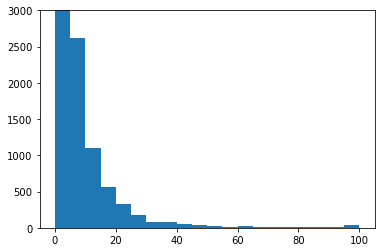

In [8]:
import matplotlib.pyplot as plt

# Loss Distribution
fig , ax = plt.subplots()
plt.hist(train_fs['loss'], bins = 20, range=(0,100))
ax.set_ylim([0,3000])
plt.show()

In [9]:
# Calculate percent of missing in each column
col_pct_miss = []
for col in train_fs.columns:
    percent_miss = np.mean(train_fs[col].isnull())*100
    if percent_miss > 0:
        col_pct_miss.append([col, percent_miss])
    
col_pct_miss_df = pd.DataFrame(col_pct_miss, columns = ['column_name','% of Missing']).sort_values(by = '% of Missing', ascending = False)
col_pct_miss_df

,column_name,% of Missing
463,f662,17.856093
464,f663,17.856093
127,f159,17.764125
128,f160,17.764125
138,f170,17.461672
...,...,...
476,f677,0.000948
474,f675,0.000948
522,f765,0.000948
477,f678,0.000948


In [10]:
#Check for infinity value
np.isinf(train_fs.select_dtypes(include=['number'])).sum().value_counts()

0    752
dtype: int64

In [11]:
np.isinf(test_fs.select_dtypes(include=['number'])).sum().value_counts()

0    751
dtype: int64

In [12]:
#Correlation for numeric columns
numer = train_fs.select_dtypes(include=['number']).columns
corr_num = {}
for col in numer:
    corr = train_fs['loss'].corr(train_fs[col])
    if not np.isnan(corr):
        corr_num[col] = abs(corr)

sorted(corr_num.items(), key=operator.itemgetter(1),reverse=True)[:20]

[('loss', 1.0),
 ('f471', 0.04003485828917935),
 ('f536', 0.025708280282810154),
 ('f674', 0.01942627015485768),
 ('f612', 0.016573365285605858),
 ('f776', 0.0155056064455043),
 ('f67', 0.014739667638450877),
 ('f670', 0.014594672438313916),
 ('f597', 0.013757525744848394),
 ('f599', 0.013757525744848394),
 ('f68', 0.012986695149725672),
 ('f221', 0.012023809245548238),
 ('f251', 0.011887234545635575),
 ('f556', 0.011431116108247819),
 ('f468', 0.011263763615718026),
 ('f13', 0.01118768648830255),
 ('f675', 0.011158112545609318),
 ('f617', 0.011151818457203571),
 ('f315', 0.011109597461438981),
 ('f353', 0.010760517192075904)]

In [13]:
#Correlation for categorical columns
cat = train_fs.select_dtypes(exclude=['number']).columns
corr_cat = {}
for col in cat:
    corr = train_fs['loss'].corr(train_fs[col].astype('category').cat.codes)
    corr_cat[col] = abs(corr)
sorted(corr_cat.items(), key=operator.itemgetter(1),reverse=True)[:10]

[('f338', 0.0054700897576016),
 ('f276', 0.005281428714661808),
 ('f390', 0.0046691877517226815),
 ('f534', 0.004625092208902312),
 ('f695', 0.0046124716041917434),
 ('f419', 0.004609759187433867),
 ('f472', 0.004411960535650982),
 ('f207', 0.00403901414782884),
 ('f627', 0.0038173679493828157),
 ('f698', 0.003543940402915744)]

# Pre-procesamiento de los datos

Conjunto *Train*

In [14]:
# Impute missing value in numeric columns with mean 
numeric_cols = train_fs.select_dtypes(include=['number']).columns.values

for col in numeric_cols:
    if col in list(col_pct_miss_df.column_name) :
        mean = train_fs[col].mean(skipna=True)
        train_fs[col] = train_fs[col].fillna(mean)

In [15]:
#Remaining columns with missing values is not numeric type
nacheck = pd.DataFrame(train_fs.isnull().sum(),columns=['result'])
nacheck[nacheck['result']>0]

,result
f137,177
f138,182
f206,1291
f207,1291
f276,101
f277,101
f390,698
f391,698
f626,698
f627,698


In [17]:
# Impute NA value in object type columns with zero, all categorical data only contain long digi except 'NA'
not_numeric_cols = train_fs.select_dtypes(exclude=['number']).columns.values

for col in not_numeric_cols:
    if col in list(col_pct_miss_df.column_name):
        train_fs.loc[train_fs[col]=='NA',col] = 0

In [18]:
#Convert all categorical data to float type, convert to type Int64 will throw errors in python
for col in cat:
    train_fs[col] = train_fs[col].astype('float64')

train_fs.dtypes.value_counts()

float64    672
int64       99
dtype: int64

In [19]:
#Fill missing value with mean after conversion of object type data
for col in cat:
    mean = train_fs[col].mean(skipna=True)
    train_fs[col] = train_fs[col].fillna(mean)

In [20]:
# Check missing value
train_fs.isnull().sum().value_counts()

0    771
dtype: int64

In [21]:
label_index = 770

train_x = train_fs.iloc[:,range(1, label_index)]
train_y= train_fs.iloc[:,-1]
display(train_x.head())
display(train_y.head())

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
0,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,126.03,...,-3.14,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5
1,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,121.35,...,-1.38,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5
2,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,126.49,...,-5.18,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5
3,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,133.58,...,-2.04,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5
4,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,112.77,...,-11.12,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5


0    0
1    0
2    0
3    0
4    0
Name: loss, dtype: int64

Conjunto *Test*

In [22]:
numeric_cols = test_fs.select_dtypes(include=['number']).columns.values

for col in numeric_cols:
    if col in list(col_pct_miss_df.column_name) :
        mean = test_fs[col].mean(skipna=True)
        test_fs[col] = test_fs[col].fillna(mean)

In [23]:
not_numeric_cols = test_fs.select_dtypes(exclude=['number']).columns.values

for col in not_numeric_cols:
    if col in list(col_pct_miss_df.column_name):
        test_fs.loc[test_fs[col]=='NA',col] = 0

In [24]:
for col in cat:
    test_fs[col] = test_fs[col].astype('float64')

test_fs.dtypes.value_counts()

float64    673
int64       96
uint64       1
dtype: int64

In [25]:
# Check for remaing columns with missing value
test_fs.isnull().sum().value_counts()
nacheck_test = pd.DataFrame(test_fs.isnull().sum(),columns=['result'])
nacheck_test[nacheck_test['result']>0]

,result
f5,864
f137,376
f138,376
f206,2816
f207,2816
f276,147
f277,152
f390,1226
f391,1226
f395,6


In [26]:
na_col = list(nacheck_test[nacheck_test['result']>0].index)
na_col

['f5',
 'f137',
 'f138',
 'f206',
 'f207',
 'f276',
 'f277',
 'f390',
 'f391',
 'f395',
 'f396',
 'f626',
 'f627',
 'f695',
 'f698',
 'f766',
 'f767']

In [27]:
#Manually update remaing columns that fail to fillna
for col in na_col:
    test_fs[col] = test_fs[col].fillna(test_fs[col].mean(skipna=True))

In [28]:
# Check for missing value again
test_fs.isnull().sum().value_counts()

0    770
dtype: int64

In [29]:
test_x = test_fs.iloc[:,range(1, label_index)]
test_x.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778
0,147,6,0.487058,1100,17.0,75506,964.0,12686.0,152.63,115.91,...,-8.71,19,3.30,-9.37,0.50,0.0539,-1.0733,0,1,1079
1,156,6,0.728518,5400,3.0,79754,1455.0,4803.0,153.95,155.50,...,-13.26,24,9.53,-7.55,6.22,0.3030,0.6087,0,1,36
2,132,9,0.898133,2200,16.0,113,5735.0,2387.0,130.61,131.96,...,-4.99,9,3.25,-2.33,1.69,0.2317,0.4184,0,0,393
3,128,7,0.038411,1300,4.0,3793,4689.0,3469.0,120.50,121.93,...,-16.83,11,0.26,-5.31,0.78,0.2826,-0.7711,0,0,394
4,119,10,0.443620,1300,16.0,13026,2788.0,7438.0,127.00,125.98,...,-20.00,10,13.55,-0.61,0.01,0.1815,-1.0843,0,0,23


# Feature Engineering

In [30]:
feature_pair_sub_list = [[520, 521], [271, 521], [271, 520], [67, 466], [623, 664], [7, 536], [66, 529], [531, 532], [561, 562], [248, 602], [570, 571], [218, 766], [64, 765], [208, 590], [423, 660], [312, 463], [290, 592], [621, 755], [52, 311], [65, 422], [350, 656], [278, 420], [320, 633], [507, 761], [0, 341], [139, 665], [10, 724], [53, 319], [367, 698], [279, 421], [9, 358], [48, 287], [375, 653], [397, 728], [197, 666], [38, 295], [402, 758], [403, 757], [549, 584], [238, 258], [296, 526], [586, 607], [291, 591], [62, 289], [16, 288], [581, 589], [8, 380], [655, 683], [58, 582]]
feature_pair_plus_list = [[466, 529], [664, 759], [602, 766], [64, 665], [279, 590], [397, 592], [311, 621], [248, 755], [660, 768], [218, 666], [65, 278], [549, 607], [16, 402], [53, 757], [463, 526], [197, 312], [507, 762], [320, 619], [367, 380], [10, 350], [62, 401], [52, 756], [610, 633], [0, 656], [319, 758], [38, 50], [288, 296], [67, 584], [48, 611], [422, 724], [249, 591], [58, 686], [287, 295], [341, 589], [208, 728], [66, 508], [44, 605], [4, 358], [9, 695]]
feature_pair_mul_list = [[466, 529], [621, 664], [159, 626], [599, 602], [213, 607], [209, 218], [433, 463], [16, 665], [619, 766], [158, 625], [558, 605], [64, 248], [402, 660], [583, 606], [53, 279], [595, 596], [367, 590], [592, 633], [52, 278], [65, 350], [10, 38], [526, 644], [42, 397], [23, 666], [401, 758], [67, 73], [54, 589], [507, 549], [358, 591], [423, 610], [250, 312], [311, 755], [66, 353], [611, 732], [645, 765], [1, 320], [88, 341], [319, 757], [286, 296], [375, 403], [48, 509], [203, 581], [422, 655], [62, 87], [283, 622], [627, 724], [258, 686], [168, 268], [0, 197], [282, 646], [420, 656]]
feature_pair_divide_list = [[712, 664], [466, 726], [463, 6], [539, 529], [602, 507], [660, 653], [64, 208], [766, 630], [590, 197], [592, 0], [100, 145], [218, 3], [65, 9], [526, 525], [607, 643], [410, 647], [610, 144], [420, 278], [311, 10], [1, 279], [468, 462], [472, 444], [248, 652], [665, 510], [583, 143], [621, 59], [656, 52], [397, 509], [196, 700], [403, 401], [655, 54], [350, 518], [312, 672], [619, 615], [591, 187], [675, 671], [666, 157], [341, 8], [367, 217], [445, 402], [67, 637], [375, 654], [379, 716], [754, 549], [320, 517], [599, 596], [589, 267], [673, 718], [422, 400], [620, 386], [680, 719], [755, 28], [765, 383], [674, 721], [358, 717], [676, 720], [66, 167], [633, 347], [681, 71]]
feature_pair_sub_mul_list=[[271, 521, 1], [520, 521, 622], [7, 536, 218], [656, 664, 619], [664, 712, 621], [664, 719, 278], [664, 731, 401], [67, 466, 529], [466, 726, 65], [466, 754, 591], [664, 671, 402], [71, 664, 403], [342, 664, 280], [351, 664, 421], [623, 664, 666], [359, 664, 440], [368, 664, 510], [376, 664, 279], [414, 664, 420], [466, 539, 589], [424, 664, 665], [33, 664, 397], [466, 559, 10], [405, 664, 422], [664, 760, 439], [39, 664, 509], [55, 664, 620], [49, 664, 672], [66, 466, 549], [634, 664, 141], [267, 466, 433], [664, 703, 328], [60, 466, 64], [386, 664, 399], [38, 466, 633], [128, 466, 590], [615, 664, 511], [44, 466, 58], [107, 466, 157], [62, 466, 48], [7, 546, 248], [314, 507, 466], [531, 532, 209], [59, 664, 70], [126, 466, 367], [45, 664, 197], [246, 466, 118], [7, 556, 607], [117, 466, 592], [265, 466, 350], [97, 466, 156], [664, 702, 88], [7, 566, 258], [53, 466, 52], [215, 766, 466], [466, 584, 108], [236, 466, 72], [116, 466, 358], [61, 466, 56], [664, 704, 87], [311, 466, 28], [176, 466, 206], [29, 466, 631], [255, 466, 341], [247, 466, 0], [260, 466, 245], [664, 708, 98], [664, 696, 447], [664, 701, 601], [256, 466, 337], [664, 751, 431], [43, 466, 42], [46, 466, 36], [466, 602, 438], [40, 466, 717], [106, 466, 226], [319, 466, 758], [664, 697, 432], [410, 466, 686], [466, 741, 8], [250, 466, 235], [664, 693, 74], [86, 466, 630], [664, 752, 166], [18, 466, 632], [561, 562, 64], [313, 466, 54], [466, 746, 210], [466, 635, 9], [19, 466, 57], [63, 466, 517], [11, 466, 37], [237, 466, 216], [14, 466, 365], [664, 738, 127], [12, 466, 506], [96, 466, 338], [664, 709, 167], [326, 466, 764], [121, 466, 382], [47, 466, 15], [320, 466, 16], [664, 747, 227], [257, 466, 659], [186, 466, 139], [77, 529, 463], [321, 466, 375], [177, 466, 147], [187, 466, 217], [185, 466, 195], [294, 466, 660], [312, 466, 23], [664, 698, 225], [7, 575, 605], [266, 466, 650], [318, 466, 651], [664, 710, 599], [664, 739, 240], [17, 466, 348], [466, 582, 276], [664, 700, 441], [664, 694, 230], [404, 664, 393], [664, 748, 515], [570, 571, 64], [466, 767, 380], [287, 466, 356], [466, 706, 196], [295, 466, 339], [664, 740, 670], [664, 711, 627], [111, 466, 78], [50, 466, 654], [445, 466, 146], [448, 602, 768], [664, 699, 753], [664, 749, 277], [296, 466, 723], [406, 664, 394], [664, 695, 518], [188, 466, 190], [466, 587, 735], [466, 750, 285], [286, 466, 759], [664, 742, 220], [289, 466, 643], [165, 466, 366], [407, 664, 392], [155, 466, 21], [288, 466, 349], [109, 466, 175], [664, 743, 661], [664, 737, 207], [30, 607, 213], [664, 761, 3], [259, 466, 249], [178, 466, 373], [81, 466, 652], [322, 664, 101], [323, 664, 137], [238, 466, 27], [324, 664, 428], [325, 664, 91], [180, 466, 25], [68, 466, 653], [430, 466, 646], [79, 466, 357], [140, 664, 396], [327, 602, 745], [302, 466, 340], [31, 607, 558], [315, 664, 644], [32, 607, 214], [34, 607, 241], [35, 607, 242], [607, 668, 243], [607, 690, 244], [607, 691, 551], [607, 692, 552], [664, 730, 669], [310, 602, 655], [408, 664, 395], [297, 466, 26], [2, 602, 744], [526, 602, 757], [100, 602, 755], [160, 466, 24], [610, 766, 208], [189, 466, 170], [179, 466, 150], [316, 664, 138], [586, 607, 624], [317, 664, 614], [119, 602, 763], [526, 765, 645], [149, 466, 73], [99, 602, 756], [229, 602, 762], [110, 466, 400], [370, 664, 5], [602, 736, 732], [455, 463, 612], [664, 667, 270], [120, 602, 682], [466, 502, 595], [148, 466, 374], [228, 602, 681], [305, 602, 718], [611, 766, 516], [423, 660, 4], [89, 602, 369], [219, 602, 678], [239, 466, 715], [472, 602, 657], [168, 766, 353], [80, 466, 385], [158, 466, 22], [303, 602, 679], [90, 602, 720], [169, 602, 647], [664, 724, 362], [281, 660, 347], [159, 602, 680], [290, 664, 398], [492, 602, 683], [291, 664, 613], [292, 664, 20], [583, 602, 721], [293, 664, 384], [298, 664, 629], [508, 602, 675], [602, 606, 299], [602, 603, 300], [585, 602, 301], [463, 482, 381], [602, 714, 282], [304, 602, 360], [602, 713, 676], [588, 602, 673], [664, 728, 383], [568, 660, 538], [425, 660, 372], [221, 660, 222], [223, 660, 224], [572, 660, 577], [541, 660, 533], [542, 660, 251], [231, 660, 252], [232, 660, 253], [233, 660, 254], [234, 660, 261], [594, 602, 677], [593, 602, 722], [64, 364, 268], [306, 664, 355], [663, 664, 618], [563, 660, 553], [409, 466, 307], [450, 660, 13], [308, 664, 389], [345, 664, 729], [548, 660, 262], [474, 660, 346], [468, 660, 442], [82, 660, 628], [92, 660, 444], [309, 664, 637], [449, 660, 51], [93, 660, 462], [94, 660, 471], [487, 660, 596], [83, 660, 443], [486, 660, 598], [95, 660, 436], [84, 660, 597], [85, 660, 6], [608, 664, 275], [477, 660, 361], [484, 660, 454], [478, 660, 481], [496, 660, 491], [497, 660, 501], [102, 660, 263], [103, 660, 264], [104, 660, 75], [105, 660, 434], [724, 727, 642], [476, 660, 636], [112, 660, 354], [457, 660, 498], [113, 660, 363]]
feature_pair_sub_list2=[[520, 521], [271, 521], [271, 520], [67, 466], [623, 664], [7, 536], [66, 529], [531, 532], [561, 562], [248, 602], [570, 571], [218, 766], [64, 765], [208, 590], [423, 660], [312, 463], [290, 592], [621, 755], [52, 311], [65, 422], [350, 656], [278, 420], [320, 633], [507, 761], [0, 341], [139, 665], [10, 724], [53, 319], [367, 698], [279, 421], [9, 358], [48, 287], [375, 653], [397, 728], [197, 666], [38, 295], [402, 758], [403, 757], [549, 584], [238, 258], [296, 526], [586, 607], [291, 591], [62, 289], [16, 288], [581, 589], [8, 380], [655, 683], [58, 582], [54, 587], [377, 657], [44, 81], [292, 735], [610, 706], [177, 401], [109, 249], [187, 756], [425, 768], [293, 723], [61, 631], [365, 730], [378, 658], [100, 239], [37, 47], [12, 632], [313, 318], [541, 542], [268, 718], [36, 46], [28, 700], [306, 763], [79, 611], [361, 722], [727, 762], [11, 506], [588, 686], [99, 267], [360, 721], [717, 759], [431, 432], [679, 720], [508, 605], [282, 391], [285, 745], [23, 519], [445, 599], [379, 716], [250, 255], [176, 326], [4, 314], [348, 671], [110, 229], [166, 167], [15, 29], [230, 235], [585, 764], [198, 283], [157, 650], [219, 767], [307, 744], [308, 315], [309, 316], [400, 743], [496, 497], [455, 472], [317, 669], [413, 689], [87, 128], [196, 327], [281, 356], [488, 498], [92, 102], [93, 103], [94, 104], [95, 105], [410, 736], [257, 266], [373, 652], [642, 732], [228, 441], [17, 137], [42, 179], [704, 712], [719, 751], [107, 305], [408, 622], [88, 118], [731, 752], [220, 265], [3, 200], [71, 339], [56, 178], [82, 484], [494, 504], [212, 516], [342, 697], [351, 404], [353, 370], [13, 132], [337, 619], [628, 742], [359, 702], [368, 709], [651, 737], [376, 708], [414, 638], [424, 710], [240, 245], [33, 406], [405, 693], [637, 760], [385, 614], [39, 73], [55, 711], [49, 407], [286, 634], [346, 371], [389, 618], [160, 195], [259, 749], [45, 59], [645, 646], [502, 699], [40, 635], [492, 695], [347, 740], [274, 464], [111, 175], [215, 386], [149, 190], [615, 629], [272, 461], [146, 748], [449, 450], [338, 703], [430, 739], [310, 747], [459, 499], [18, 19], [277, 694], [476, 477], [148, 150], [302, 322], [323, 382], [14, 324], [57, 325], [517, 738], [43, 701], [336, 418], [465, 489], [138, 276], [83, 468], [448, 696], [205, 426], [294, 298], [299, 753], [300, 511], [127, 301], [144, 214], [204, 467], [608, 609], [170, 741], [143, 734], [133, 398], [191, 675], [192, 680], [269, 284], [237, 256], [80, 155], [193, 678], [194, 673], [130, 676], [21, 543], [134, 202], [142, 681], [662, 663], [363, 667], [135, 273], [331, 332], [674, 677], [112, 474], [199, 682], [275, 412], [168, 217], [345, 362], [460, 470], [171, 563], [490, 500], [247, 559], [172, 548], [366, 558], [173, 231], [174, 232], [270, 411], [181, 514], [161, 233], [162, 234], [169, 189], [343, 352], [211, 213], [84, 486], [344, 687], [85, 487], [182, 369], [163, 568], [164, 572], [512, 513], [183, 577], [349, 533], [612, 684], [184, 525], [151, 546], [152, 556], [153, 566], [154, 575], [27, 553], [446, 705], [384, 613], [515, 729], [5, 644], [25, 451], [86, 225], [241, 357], [221, 251], [222, 252], [223, 253], [224, 254], [493, 503], [552, 672], [26, 242], [180, 216], [523, 535], [243, 340], [24, 244], [261, 538], [89, 90], [262, 374], [263, 630], [264, 715], [428, 551], [117, 156], [201, 524], [51, 433], [60, 419], [522, 528], [647, 670], [627, 733], [131, 544], [534, 564], [434, 596], [545, 555], [78, 573], [77, 554], [185, 364], [136, 520], [495, 505], [435, 597], [2, 390], [113, 457], [120, 478], [114, 594], [115, 321], [603, 604], [260, 565], [303, 574], [547, 595], [209, 392], [396, 557], [537, 567], [576, 639], [41, 560], [165, 518], [297, 550], [96, 121], [122, 482], [119, 123], [91, 124], [116, 125], [437, 600], [569, 578], [30, 415], [746, 750], [76, 443], [393, 643], [453, 469], [456, 483], [442, 725], [74, 438], [203, 527], [479, 480], [98, 540], [458, 485], [141, 661], [31, 236], [394, 620], [32, 640], [473, 475], [34, 354], [452, 462], [713, 714], [72, 330], [659, 726], [580, 648], [75, 707], [35, 427], [329, 754], [97, 108], [186, 668], [395, 399], [6, 471], [246, 690], [510, 593], [101, 444], [439, 691], [20, 688], [454, 692], [106, 481], [147, 491], [126, 501], [436, 583], [416, 530], [226, 227], [598, 606], [383, 685], [50, 69], [509, 539], [328, 624], [68, 654], [158, 159], [63, 641], [304, 372], [355, 649], [280, 636], [188, 333], [625, 626], [1, 417], [206, 440], [22, 387], [129, 429], [334, 381], [70, 616], [145, 335], [140, 210]]
feature_pair_plus_list2=[[466, 529], [664, 759], [602, 766], [64, 665], [279, 590], [397, 592], [311, 621], [248, 755], [660, 768], [218, 666], [65, 278], [549, 607], [16, 402], [53, 757], [463, 526], [197, 312], [507, 762], [320, 619], [367, 380], [10, 350], [62, 401], [52, 756], [610, 633], [0, 656], [319, 758], [38, 50], [288, 296], [67, 584], [48, 611], [422, 724], [249, 591], [58, 686], [287, 295], [341, 589], [208, 728], [66, 508], [44, 605], [4, 358], [9, 695], [54, 99], [100, 258], [425, 577], [3, 655], [581, 765], [8, 694], [519, 658], [267, 582], [587, 706], [290, 420], [717, 730], [282, 561], [177, 238], [36, 326], [727, 763], [423, 543], [599, 631], [283, 657], [516, 689], [235, 764], [109, 187], [291, 608], [137, 767], [51, 292], [214, 721], [293, 346], [200, 268], [157, 289], [219, 229], [623, 653], [281, 533], [570, 732], [138, 745], [314, 667], [663, 761], [315, 421], [375, 400], [565, 722], [228, 305], [514, 718], [79, 176], [316, 510], [280, 317], [212, 720], [652, 671], [110, 441], [313, 403], [41, 744], [284, 465], [251, 646], [175, 632], [209, 743], [179, 196], [390, 712], [364, 622], [28, 723], [506, 650], [37, 195], [571, 683], [211, 426], [42, 170], [132, 677], [640, 742], [71, 643], [662, 737], [472, 736], [682, 705], [265, 559], [5, 332], [525, 680], [536, 678], [546, 675], [69, 342], [15, 318], [56, 255], [556, 673], [641, 719], [545, 716], [700, 729], [298, 609], [669, 735], [299, 410], [80, 239], [459, 734], [300, 354], [141, 749], [440, 731], [377, 513], [107, 121], [351, 419], [140, 359], [368, 439], [376, 509], [372, 414], [381, 424], [33, 217], [405, 518], [636, 760], [46, 150], [461, 578], [216, 257], [39, 445], [55, 139], [49, 399], [620, 634], [149, 156], [74, 699], [133, 547], [604, 740], [460, 687], [189, 386], [207, 615], [90, 748], [353, 703], [17, 259], [418, 512], [178, 739], [432, 698], [301, 747], [322, 404], [352, 535], [59, 323], [324, 407], [325, 408], [417, 464], [523, 684], [455, 738], [435, 676], [87, 190], [601, 701], [76, 681], [345, 702], [45, 186], [406, 752], [447, 704], [237, 697], [167, 751], [159, 696], [369, 453], [148, 693], [411, 733], [285, 365], [81, 588], [467, 616], [603, 709], [206, 708], [710, 741], [146, 327], [348, 638], [247, 711], [134, 524], [647, 679], [443, 674], [451, 558], [271, 378], [412, 434], [310, 337], [450, 541], [449, 542], [82, 231], [83, 232], [84, 233], [85, 234], [135, 335], [213, 437], [477, 566], [476, 575], [7, 112], [478, 552], [113, 261], [114, 262], [115, 263], [241, 457], [361, 574], [427, 528], [111, 128], [488, 548], [360, 520], [242, 494], [484, 562], [343, 521], [252, 487], [253, 486], [92, 254], [356, 642], [553, 624], [93, 264], [94, 243], [95, 244], [415, 557], [88, 302], [468, 551], [215, 502], [198, 391], [446, 544], [362, 563], [585, 726], [495, 560], [573, 725], [30, 245], [452, 564], [370, 572], [474, 568], [339, 645], [379, 555], [483, 567], [23, 205], [522, 554], [538, 654], [473, 576], [75, 413], [155, 168], [504, 531], [498, 532], [166, 180], [344, 480], [493, 537], [122, 221], [123, 222], [124, 223], [125, 224], [534, 600], [492, 651], [236, 260], [19, 127], [57, 392], [485, 569], [31, 586], [86, 108], [14, 511], [505, 550], [225, 595], [330, 442], [202, 456], [61, 63], [126, 246], [6, 329], [458, 540], [47, 396], [306, 659], [334, 475], [21, 644], [490, 648], [89, 750], [527, 685], [43, 627], [479, 707], [12, 433], [158, 227], [60, 393], [444, 625], [294, 753], [366, 672], [18, 185], [371, 628], [596, 626], [389, 470], [11, 169], [210, 307], [188, 308], [309, 328], [40, 539], [203, 688], [22, 454], [374, 481], [1, 491], [438, 501], [436, 639], [387, 530], [431, 598], [129, 489], [349, 373], [469, 597], [70, 462], [72, 471], [333, 649], [276, 338], [68, 226], [32, 713], [409, 496], [429, 497], [102, 304], [103, 256], [104, 118], [105, 355], [266, 515], [204, 416], [106, 606], [363, 428], [77, 382], [27, 171], [29, 635], [25, 172], [277, 448], [173, 357], [117, 250], [26, 174], [331, 499], [73, 637], [230, 240], [272, 503], [116, 160], [142, 269], [2, 78], [145, 500], [714, 754], [161, 340]]
feature_pair_sub_list_sf=[[271, 521], [520, 521], [271, 520], [592, 608], [238, 248], [186, 766], [60, 311], [176, 218], [9, 397], [248, 750], [90, 529], [396, 766], [660, 724], [108, 507], [107, 660], [65, 320], [577, 660], [271, 521], [10, 455], [64, 126], [56, 312], [664, 757], [518, 590], [511, 602], [65, 298], [259, 665], [12, 590], [529, 582], [291, 589], [187, 660], [296, 526], [64, 159], [170, 320], [64, 724], [65, 187], [508, 665], [298, 660], [358, 752], [592, 706], [25, 664], [397, 619], [466, 691], [52, 664], [665, 736], [350, 609], [665, 666], [664, 669], [248, 602], [66, 666], [118, 463], [311, 590], [64, 346], [309, 590], [312, 506], [319, 611], [660, 750], [65, 185], [706, 757], [764, 766], [271, 520], [394, 466], [150, 319], [367, 636], [611, 621], [64, 265], [186, 602], [10, 509], [89, 350], [590, 605], [312, 508], [101, 311], [358, 710], [399, 591], [664, 756], [507, 699], [229, 312], [98, 466], [661, 757], [165, 463], [62, 350], [328, 592], [586, 660], [68, 665], [156, 350], [633, 664], [218, 713], [311, 607], [187, 757], [511, 766], [338, 466], [559, 664], [63, 664], [318, 507], [509, 664], [659, 660], [64, 753], [249, 664], [169, 320], [10, 209], [584, 660], [422, 665], [394, 664], [19, 590], [341, 703], [101, 466], [231, 660], [41, 64], [38, 590], [350, 445], [7, 546], [350, 711], [631, 664], [188, 664], [65, 177], [100, 296], [410, 660], [50, 766], [287, 766], [187, 665], [24, 660], [160, 350], [34, 507], [303, 529], [472, 660], [421, 422], [549, 621], [81, 466], [660, 736], [61, 590], [664, 668], [515, 602], [99, 350], [260, 350], [246, 466], [71, 664], [660, 663], [302, 602], [220, 664], [310, 350], [259, 602], [431, 660], [558, 660], [120, 766], [665, 761], [64, 91], [179, 248], [36, 664], [664, 735], [16, 466], [10, 237], [107, 766], [66, 592], [592, 691], [338, 602], [177, 466], [33, 367], [350, 433], [64, 403], [220, 602], [12, 529], [106, 664], [65, 100], [216, 602], [507, 627], [656, 696], [196, 529], [373, 660], [350, 761], [529, 713], [466, 593], [77, 660], [86, 397], [305, 367], [63, 367], [638, 664], [175, 665], [305, 466], [72, 367], [520, 521], [220, 660], [64, 510], [96, 367], [10, 724], [367, 706], [248, 287], [185, 397], [64, 621], [303, 466], [91, 592], [466, 664], [86, 590], [438, 507], [64, 754], [65, 539], [42, 590], [341, 342], [36, 590], [176, 529], [286, 592], [150, 279], [350, 714], [65, 656], [38, 766], [656, 752], [431, 664], [583, 665], [472, 664], [197, 466], [726, 766], [592, 692], [656, 660], [266, 507], [180, 592], [660, 758], [367, 608], [448, 466], [96, 590], [445, 592], [350, 754], [287, 466], [229, 766], [116, 397], [260, 590], [466, 585], [87, 279], [57, 665], [187, 367], [37, 529], [10, 37], [64, 208], [602, 754], [186, 279], [15, 664], [65, 661], [86, 463], [196, 507], [45, 664], [67, 690], [65, 206], [267, 591], [466, 515], [397, 746], [294, 766], [237, 367], [589, 592], [502, 766], [37, 320], [367, 763], [507, 729], [397, 627], [109, 755], [64, 90], [180, 466], [65, 604], [257, 766], [207, 592], [168, 602], [176, 248], [506, 660], [276, 397], [636, 660], [664, 764], [179, 463], [100, 466], [457, 660], [420, 660], [250, 590], [255, 602], [638, 660], [367, 509], [40, 279], [507, 609], [98, 766], [603, 665], [318, 529], [64, 401], [126, 590], [166, 590], [218, 508], [393, 507], [63, 766], [276, 507], [41, 664], [341, 761], [311, 714], [111, 664], [169, 766], [341, 376], [10, 80], [97, 466], [552, 660], [664, 703], [295, 529], [664, 692], [323, 664], [250, 602], [96, 766], [287, 602], [219, 466], [79, 660], [585, 766], [250, 529], [313, 665], [590, 659], [278, 420], [32, 466], [10, 706], [147, 350], [10, 311], [289, 766], [43, 466], [10, 585], [246, 463], [350, 712], [10, 309], [397, 441], [432, 664], [664, 693], [583, 664], [29, 602], [35, 311], [235, 660], [41, 507], [397, 668], [325, 350], [466, 746], [342, 664], [67, 607], [238, 757], [63, 590], [52, 296], [32, 660], [265, 463], [15, 312], [397, 447], [227, 602], [65, 394], [10, 109], [219, 660], [665, 767], [110, 466], [88, 660], [664, 742], [96, 397], [586, 664], [664, 694], [358, 615], [298, 590], [279, 296], [65, 750], [65, 101], [185, 311], [64, 539], [52, 288], [72, 664], [366, 664], [218, 311], [117, 664], [326, 766], [466, 590], [592, 754], [54, 664], [226, 529], [65, 447], [74, 665], [507, 753], [279, 744], [219, 592], [67, 529], [91, 602], [111, 367], [664, 738], [279, 316], [249, 665], [65, 757], [350, 763], [602, 714], [305, 660], [8, 367], [110, 367], [8, 375], [664, 736], [15, 602], [137, 665], [65, 313], [219, 507], [345, 664], [312, 764], [236, 248], [116, 664], [350, 651], [32, 218], [664, 746], [302, 592], [220, 279], [99, 766], [195, 664], [278, 664], [265, 466], [227, 529], [650, 664], [206, 466], [296, 589], [218, 583], [664, 700], [279, 286], [62, 367], [248, 367], [64, 78], [209, 507], [218, 660], [279, 314], [518, 664], [10, 633], [515, 590], [139, 397], [507, 668], [666, 741], [64, 294], [259, 660], [350, 518], [2, 507], [341, 737], [394, 660], [65, 763], [10, 439], [150, 312], [250, 311], [41, 65], [139, 350], [64, 629], [66, 549], [313, 529], [118, 766], [401, 660], [107, 350], [167, 590], [64, 176], [180, 350], [67, 279], [262, 660], [660, 704], [15, 64], [67, 590], [240, 660], [466, 539], [77, 397], [466, 765], [350, 407], [297, 766], [127, 367], [306, 660], [100, 320], [9, 350], [47, 507], [338, 592], [53, 592], [367, 712], [51, 665], [65, 226], [91, 664], [10, 371], [65, 765], [10, 299], [65, 139], [438, 664], [230, 466], [367, 760], [62, 319], [155, 320], [33, 664], [121, 466], [260, 320], [602, 755], [327, 664], [582, 755], [549, 691], [16, 296], [508, 660], [403, 666], [35, 64], [16, 602], [108, 466], [238, 350], [88, 602], [590, 666], [65, 744], [64, 611], [240, 529], [320, 606], [107, 529], [159, 466], [177, 665], [186, 529], [108, 592], [664, 712], [52, 592], [515, 660], [47, 311], [197, 633], [425, 660], [396, 529], [150, 660]]

In [31]:
#f_regression to find correlation, dict.iteritems() deprecate in python3
def getTopFeatures(train_x, train_y, n_features=100):
    f_val, p_val = f_regression(train_x,train_y)
    f_val_dict = {}
    p_val_dict = {}
    for i in range(len(f_val)):
        if math.isnan(f_val[i]):
            f_val[i] = 0.0
        f_val_dict[i] = f_val[i]
        if math.isnan(p_val[i]):
            p_val[i] = 0.0
        p_val_dict[i] = p_val[i]
    
    sorted_f = sorted(f_val_dict.items(), key=operator.itemgetter(1),reverse=True)
    sorted_p = sorted(p_val_dict.items(), key=operator.itemgetter(1),reverse=True)
    
    feature_indexs = []
    for i in range(0,n_features):
        feature_indexs.append(sorted_f[i][0])
    
    return feature_indexs

In [32]:
feature_indexs = getTopFeatures(train_x, train_y)

/Users/raulartiguesfemenia/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/Users/raulartiguesfemenia/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/Users/raulartiguesfemenia/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [33]:
# generate the new data, based on which features are generated, and used
def get_data(train_x, feature_indexs, feature_minus_pair_list=[], feature_plus_pair_list=[],
            feature_mul_pair_list=[], feature_divide_pair_list = [], feature_pair_sub_mul_list=[],
            feature_pair_plus_mul_list = [],feature_pair_sub_divide_list = [], feature_minus2_pair_list = [],feature_mul2_pair_list=[], 
            feature_sub_square_pair_list=[], feature_square_sub_pair_list=[],feature_square_plus_pair_list=[]):
    sub_train_x = train_x.iloc[:,feature_indexs].to_numpy()
    for i in range(len(feature_minus_pair_list)):
        ind_i = feature_minus_pair_list[i][0]
        ind_j = feature_minus_pair_list[i][1]
        sub_train_x = np.column_stack((sub_train_x, train_x.iloc[:,ind_i]-train_x.iloc[:,ind_j]))
    
    for i in range(len(feature_plus_pair_list)):
        ind_i = feature_plus_pair_list[i][0]
        ind_j = feature_plus_pair_list[i][1]
        sub_train_x = np.column_stack((sub_train_x, train_x.iloc[:,ind_i] + train_x.iloc[:,ind_j]))

#Submission score (SVR only) is 0.54 by using above 2 features, 0.64 with mul_pair_list, 0.8 with all extra features
    for i in range(len(feature_mul_pair_list)):
        ind_i = feature_mul_pair_list[i][0]
        ind_j = feature_mul_pair_list[i][1]
        sub_train_x = np.column_stack((sub_train_x, train_x.iloc[:,ind_i] * train_x.iloc[:,ind_j]))
    
    for i in range(len(feature_divide_pair_list)):
        ind_i = feature_divide_pair_list[i][0]
        ind_j = feature_divide_pair_list[i][1]
        sub_train_x = np.column_stack((sub_train_x, train_x.iloc[:,ind_i] / train_x.iloc[:,ind_j]))
    
    for i in range(len(feature_pair_sub_mul_list)):
        ind_i = feature_pair_sub_mul_list[i][0]
        ind_j = feature_pair_sub_mul_list[i][1]
        ind_k = feature_pair_sub_mul_list[i][2]
        sub_train_x = np.column_stack((sub_train_x, (train_x.iloc[:,ind_i]-train_x.iloc[:,ind_j]) * train_x.iloc[:,ind_k]))
        
    return sub_train_x

In [34]:
#Sub train data for classification
sub_x_Train_clf = get_data(train_x, feature_indexs[:16], feature_pair_sub_list
            ,feature_pair_plus_list, feature_pair_mul_list, feature_pair_divide_list[:20], feature_pair_sub_mul_list[:20])
sub_x_Train_clf

array([[ 1.17000e+00,  1.13000e+00,  3.30000e+01, ..., -8.12000e+01,
        -7.39200e+01,  7.29000e-02],
       [ 1.20000e+00,  1.18000e+00,  4.30000e+01, ..., -3.50390e+02,
        -3.84430e+02,  7.29000e-02],
       [ 1.17000e+00,  1.16000e+00,  1.00000e+02, ..., -4.43700e+02,
        -5.14605e+02,  2.43000e-02],
       ...,
       [ 1.14000e+00,  1.15000e+00,  7.00000e+00, ..., -2.14200e+01,
        -1.78350e+01, -4.12000e-02],
       [ 1.17000e+00,  1.12000e+00,  3.00000e+01, ..., -3.30400e+02,
        -4.76000e+02,  0.00000e+00],
       [ 1.16000e+00,  1.15000e+00,  8.00000e+00, ..., -1.36500e+01,
        -2.52300e+01,  4.12000e-02]])

In [35]:
#Check for 1st stacking result, less columns after stacking due to only extract top 100 features from train DF,
sub_x_Train_clf.shape

(105471, 195)

In [36]:
#Sub train data for model prediction
sub_x_Train_pre = get_data(train_x, feature_indexs[:100], feature_pair_sub_list_sf
    ,feature_pair_plus_list2[:100], feature_pair_mul_list[:40], feature_pair_divide_list, feature_pair_sub_mul_list)
sub_x_Train_pre.shape

(105471, 1093)

In [37]:
sub_x_Test_clf = get_data(test_x, feature_indexs[:16], feature_pair_sub_list
            ,feature_pair_plus_list, feature_pair_mul_list, feature_pair_divide_list[:20], feature_pair_sub_mul_list[:20])
sub_x_Test_clf.shape

(210944, 195)

In [38]:
sub_x_Test_pre = get_data(test_x, feature_indexs[:100], feature_pair_sub_list_sf
    ,feature_pair_plus_list2[:100], feature_pair_mul_list[:40], feature_pair_divide_list, feature_pair_sub_mul_list)
sub_x_Test_pre.shape

(210944, 1093)

In [39]:
#Return value for default loan (loss > 0) with 1
def toLabels(train_y):
    labels = np.zeros(len(train_y))
    labels[train_y>0] = 1
    return labels

In [40]:
#Only minority loans are default, the targets are imbalanced dataset
labels = toLabels(train_y)
pd.DataFrame(labels).value_counts()

0.0    95688
1.0     9783
dtype: int64

# MODELOS

<B>Loan default status classification</B>

In [41]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
sc = rs.fit_transform(sub_x_Train_clf)

In [42]:
rc = RandomForestClassifier(n_estimators=145,max_depth=18,n_jobs=-1,random_state=42,min_samples_split=4)
rc.fit(sc,labels)
rc_pre = rc.predict(sc)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(labels,rc_pre)

0.999506973480862

In [44]:
sc_test = rs.transform(sub_x_Test_clf)
pred_labels = rc.predict(sc_test)

In [45]:
ind_test = np.where(pred_labels==1)[0]
ind_test

array([     3,      5,     12, ..., 210920, 210939, 210940])

In [46]:
#Obtain index where the train data is default loan
ind_train = np.where(train_y > 0)[0]
ind_train

array([     7,     16,     26, ..., 105440, 105456, 105463])

In [47]:
#Obtain index where loan is not default
ind_train0 = np.where(train_y == 0)[0]
print(len(ind_train0))
ind_test0 = np.where(pred_labels==0)[0]
print(len(ind_test0))

95688
178892


Support Vector Regression

In [48]:
#Only transform test data with predicted default status
scaler = RobustScaler()
sub_x_Train = scaler.fit_transform(sub_x_Train_pre)
sub_x_Test_pre[ind_test] = scaler.transform(sub_x_Test_pre[ind_test])

In [49]:
svr = SVR(C=16, kernel='rbf', gamma =  0.000122)
svr.fit(sub_x_Train[ind_train], np.log(train_y[ind_train]))

SVR(C=16, gamma=0.000122)

In [50]:
from sklearn.metrics import mean_squared_log_error

In [51]:
#Evaluate model performance against train dataset, the score is 0.20

preds = svr.predict(sub_x_Train[ind_train])
preds_all = np.zeros(train_fs.shape[0])
preds_all[ind_train] = np.power(np.e, preds)
preds_all[ind_train0] = 0

mean_squared_log_error(train_y.values,preds_all)

0.0072073296678898694

In [52]:
#Generate Test prediction
predict = svr.predict(sub_x_Test_pre[ind_test])
prediction_svr = np.zeros(test_fs.shape[0])
prediction_svr[ind_test] = np.power(np.e, predict)
prediction_svr[ind_test0] = 0
prediction_svr

array([0., 0., 0., ..., 0., 0., 0.])

XG BOOST

In [54]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

params = {"objective": "reg:linear", # for linear regression
          "booster" : "gbtree",   # use tree based models 
          "eta": 0.005,   # learning rate
          "max_depth": 10,    # maximum depth of a tree
          "subsample": 0.9,    # Subsample ratio of the training instances
          "colsample_bytree": 0.7,   # Subsample ratio of columns when constructing each tree
          "silent": 1,   # silent mode
          "seed": 10   # Random number seed
          }

In [55]:
num_boost_round = 1749

dtrain = xgb.DMatrix(sub_x_Train[ind_train],np.log(train_y[ind_train]))

model = xgb.train(params, dtrain, num_boost_round)

[17:36:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[17:36:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [61]:
#Evaluate overall performance
dtrain_check = xgb.DMatrix(sub_x_Train[ind_train])
preds_xg = model.predict(dtrain_check)
preds_all_xg = np.zeros(train_fs.shape[0])
preds_all_xg[ind_train] = np.power(np.e, preds_xg)
preds_all_xg[ind_train0] = 0
round(mean_squared_log_error(train_y.values,preds_all_xg),6)

0.00021

In [57]:
#Generate Test prediction
test_Dmatrix = xgb.DMatrix(sub_x_Test_pre[ind_test])
predict = model.predict(test_Dmatrix)
prediction_xg = np.zeros(test_fs.shape[0])
prediction_xg[ind_test] = np.power(np.e, predict)
prediction_xg[ind_test0] = 0
pd.DataFrame(prediction_xg).describe()

,0
count,210944.000000
mean,0.999669
std,2.640069
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,46.994869


# Predicción Final

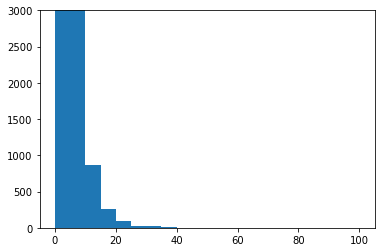

,0
count,210944.000000
mean,0.905341
std,2.374102
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,71.986862


In [62]:
pred_all = prediction_xg * 0.5 + prediction_svr * 0.5
fig , ax = plt.subplots()
plt.hist(pred_all, bins = 20, range=(0,100))
ax.set_ylim([0,3000])
plt.show()        
        
pd.DataFrame(pred_all).describe()

In [63]:
test_fs['loss'] = pred_all

In [64]:
sample_submission = test_fs[['id','loss']]
sample_submission.to_csv('sample_submission_rf.csv', index = False)

# Solución

Se ha obtenido un error absoluto medio de: 0.00021
El score obtenido con Kaggle ha sido de: